<a href="https://colab.research.google.com/github/33577/suicideRatePrediction/blob/master/Suicide_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
ls

sample_data/


In [0]:
import pandas as pd
df1 = pd.read_csv('suicide_rates.csv')
df2 = pd.read_csv('countries_of_the_world.csv')


In [0]:
df1_2010 = df1[df1.year == 2010]
df1_2010.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
252,Albania,2010,male,55-74 years,20,241852,8.27,Albania2010,0.722,"11,926,953,259",4359,Silent
253,Albania,2010,male,35-54 years,20,371611,5.38,Albania2010,0.722,"11,926,953,259",4359,Generation X
254,Albania,2010,male,25-34 years,9,179720,5.01,Albania2010,0.722,"11,926,953,259",4359,Generation X
255,Albania,2010,male,75+ years,2,50767,3.94,Albania2010,0.722,"11,926,953,259",4359,Silent
256,Albania,2010,male,15-24 years,10,279508,3.58,Albania2010,0.722,"11,926,953,259",4359,Millenials


In [0]:
df1_2010.drop('suicides_no', axis=1, inplace=True)
df1_2010.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,country,year,sex,age,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
252,Albania,2010,male,55-74 years,241852,8.27,Albania2010,0.722,"11,926,953,259",4359,Silent
253,Albania,2010,male,35-54 years,371611,5.38,Albania2010,0.722,"11,926,953,259",4359,Generation X
254,Albania,2010,male,25-34 years,179720,5.01,Albania2010,0.722,"11,926,953,259",4359,Generation X
255,Albania,2010,male,75+ years,50767,3.94,Albania2010,0.722,"11,926,953,259",4359,Silent
256,Albania,2010,male,15-24 years,279508,3.58,Albania2010,0.722,"11,926,953,259",4359,Millenials


In [0]:
df1_2010.drop('population', axis=1, inplace=True)
df1_2010.drop('country-year', axis=1, inplace=True)
df1_2010.drop('HDI for year', axis=1, inplace=True)
df1_2010.drop('year', axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
df1_2010.head()

,country,year,sex,age,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
252,Albania,2010,male,55-74 years,8.27,"11,926,953,259",4359,Silent
253,Albania,2010,male,35-54 years,5.38,"11,926,953,259",4359,Generation X
254,Albania,2010,male,25-34 years,5.01,"11,926,953,259",4359,Generation X
255,Albania,2010,male,75+ years,3.94,"11,926,953,259",4359,Silent
256,Albania,2010,male,15-24 years,3.58,"11,926,953,259",4359,Millenials


In [0]:
# 나중에 앞으로 빼자 
# column 이름에 스페이스바 지우기 
df1_2010.columns = df1_2010.columns.str.replace(' ', '')
df1_2010.head()

,country,year,sex,age,suicides/100kpop,gdp_for_year($),gdp_per_capita($),generation
252,Albania,2010,male,55-74 years,8.27,"11,926,953,259",4359,Silent
253,Albania,2010,male,35-54 years,5.38,"11,926,953,259",4359,Generation X
254,Albania,2010,male,25-34 years,5.01,"11,926,953,259",4359,Generation X
255,Albania,2010,male,75+ years,3.94,"11,926,953,259",4359,Silent
256,Albania,2010,male,15-24 years,3.58,"11,926,953,259",4359,Millenials


In [0]:
df1_2010.drop('gdp_for_year($)', axis=1, inplace=True)
df1_2010.drop('gdp_per_capita($)', axis=1, inplace=True)
df1_2010.drop('generation', axis=1, inplace=True)
df1_2010.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,country,year,sex,age,suicides/100kpop
252,Albania,2010,male,55-74 years,8.27
253,Albania,2010,male,35-54 years,5.38
254,Albania,2010,male,25-34 years,5.01
255,Albania,2010,male,75+ years,3.94
256,Albania,2010,male,15-24 years,3.58


In [0]:
df2.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [0]:
df1_2010.head()

,country,year,sex,age,suicides/100kpop
252,Albania,2010,male,55-74 years,8.27
253,Albania,2010,male,35-54 years,5.38
254,Albania,2010,male,25-34 years,5.01
255,Albania,2010,male,75+ years,3.94
256,Albania,2010,male,15-24 years,3.58


In [0]:
df2['Climate'].value_counts()


2      111
3       48
1       29
1,5      8
4        6
2,5      3
Name: Climate, dtype: int64

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

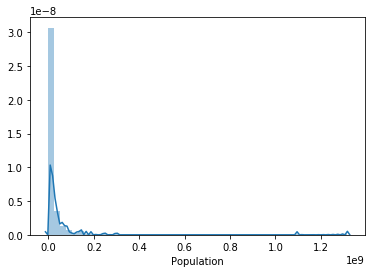

In [0]:
sns.distplot(df2['Population'])

## check null value 


In [0]:
df2_na = (df2.isnull().sum() / len(df2)) * 100
df2_na = df2_na.drop(df2_na[df2_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df2_na})
missing_data.head(20)

,missing ratio
Climate,9.691630
Literacy (%),7.929515
Industry,7.048458
Service,6.607930
Agriculture,6.607930
Deathrate,1.762115
Phones (per 1000),1.762115
Birthrate,1.321586
Infant mortality (per 1000 births),1.321586
Net migration,1.321586


### fill None in missing values

In [0]:
df2['Climate'] = df2['Climate'].fillna("None")
df2_column_headers = list(df2.columns.values)
for c in df2_column_headers:
  df2[c] = df2[c].fillna("None")


In [0]:
df2['Climate'].value_counts()

2       111
3        48
1        29
None     22
1,5       8
4         6
2,5       3
Name: Climate, dtype: int64

In [0]:
# df1_2010은 missing value가 없다.
df1_2010_na = (df1_2010.isnull().sum() / len(df1_2010)) * 100
df1_2010_na = df1_2010_na.drop(df1_2010_na[df1_2010_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df1_2010_na})
missing_data.head(20)

,missing ratio


## df1_2010 df2 합치기

In [0]:
df1_2010.head()

,country,year,sex,age,suicides/100kpop
252,Albania,2010.0,male,55-74 years,8.27
253,Albania,2010.0,male,35-54 years,5.38
254,Albania,2010.0,male,25-34 years,5.01
255,Albania,2010.0,male,75+ years,3.94
256,Albania,2010.0,male,15-24 years,3.58


In [0]:
df2.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None


In [0]:
df1_2010.columns = df1_2010.columns.str.replace('country', 'Country')

#all_data = pd.merge(df1_2010, df2, on='Country', how = 'inner')
#all_data = pd.merge(df1_2010, df2)
#all_data
#df1_2010.rename({'country':'Country'}, axis = 1)

#df1_2010.Country = df1_2010.Country.astype(str)
df2.Country = df2.Country.astype(str)

#df1_2010 = df1_2010.astype(str)
#df2 = df2.astype(str)

df1_2010.head()
df2.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None


In [0]:
df1_2010[df1_2010.Country=='Albania']

,Country,year,sex,age,suicides/100kpop
252,Albania,2010,male,55-74 years,8.27
253,Albania,2010,male,35-54 years,5.38
254,Albania,2010,male,25-34 years,5.01
255,Albania,2010,male,75+ years,3.94
256,Albania,2010,male,15-24 years,3.58
257,Albania,2010,female,25-34 years,3.27
258,Albania,2010,female,75+ years,3.10
259,Albania,2010,female,35-54 years,3.04
260,Albania,2010,female,55-74 years,2.90
261,Albania,2010,female,15-24 years,2.28


In [0]:
df2[df2.Country=='Andorra ']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None


In [0]:
df2['Country'] = df2['Country'].str.strip()
df2[df2.Country=='Andorra']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None


In [0]:
all_data = pd.merge(df2, df1_2010, on='Country')
all_data.head()
#pd.merge(df1_2010, df2, left_on = 'country', right_on = 'Country', how = 'inner', indicator = True)

#pd.concat([df1_2010, df2], join = 'inner', axis = 1)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,year,sex,age,suicides/100kpop
0,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",2010,male,55-74 years,8.27
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",2010,male,35-54 years,5.38
2,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",2010,male,25-34 years,5.01
3,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",2010,male,75+ years,3.94
4,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",2010,male,15-24 years,3.58


In [0]:
#TODO
corr = all_data.corr(method='pearson').drop(['suicides/100kpop']).sort_values('suicides/100kpop', ascending=False)['suicides/100kpop']
corr

NameError: ignored